$\textbf{Задача}$\
Пусть $x_1,\ldots,x_m$ ∼ $Exp(\alpha)$. Продемонстрируйте, что случайная величина $\alpha x_{|n|} − \ln(n)$ слабо сходится к случайной величине с функцией распределения $e^{-e^{-x}},\ x\in\mathbb{R}$.

Рассмотрим случайную величину $\eta = \alpha x_{|n|} − \ln(n)$. Тогда ее функция распределения есть

$$F_{\eta}(t) = \Pr (\alpha x_{|n|}-\ln(n)) = \Pr\left(x_{|n|}<\frac{t+\ln(n)}{\alpha}\right)$$

Для $t\leqslant -\ln(n)$ получаем $F_{\eta}(t) = 0$, так как $x_i$ ~ $Exp(\alpha)$ и $x_i\geqslant 0$.

Для $t>-\ln(n)$ видим, что наибольший элемент из выборки $x_{|n|}$ не превосходит некоторую величину, а значит, для любого элемента из выборки выполняется такое же неравенство. Тогда 

$$F_{\eta}(t) = \Pr\left(x_i<\frac{t+\ln(n)}{\alpha},\ \forall i\in[1, n]\right) = \left(\Pr\left(x_i<\frac{t+\ln(n)}{\alpha}\right)\right)^n = \left(1-\exp(-\alpha \frac{t+\ln(n)}{\alpha})\right)^n= \left(1-\frac{e^{-t}}{n}\right)^n \to e^{-e^{-t}}$$



Теперь покажем это графически. Построим функцию распределения $F_{\eta}(t)$ для разных $n$ и покажем, что все сходится куда надо.

In [1]:
import numpy as np
import seaborn as sns
import numpy.random as rd
import matplotlib.pyplot as plt
import math
from IPython.display import display, Math
import scipy.stats as st

Определим функцию распределения $F_{\eta}(t)$. Как мы видели из доказательства,

$$F_{\eta}(t) = \left(\Pr\left(x_i<\frac{t+\ln(n)}{\alpha}\right)\right)^n$$

Видно, что последнее есть функция распределения случайной величины $x$ ~ $Exp(\alpha)$, тогда

$$F_{\eta}(t) = \left(F_x\left(\frac{t+\ln(n)}{\alpha}\right)\right)^n$$

Воспользуемся библиотечной реализацией экспоненциального распределения:

In [2]:
def f(n, t, alpha=1):
    x = (t+np.log(n))/alpha
    return st.expon.cdf(x, scale=1/alpha)**n

Так же определим функцию $e^{-e^{-t}}$:

In [3]:
def e2e(t):
    return np.exp(-np.exp(-t))

Построим графики

Для начала проверим, что от параметра $\alpha$ ничего не зависит:

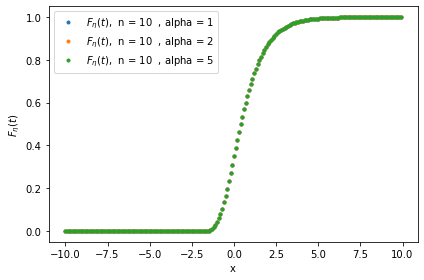

In [4]:
cmap = plt.get_cmap("tab10").colors

plt.figure(figsize=(6, 4))

x = [-10 + 0.1*i for i in range(200)]

n = 10
for k, alpha in enumerate([1, 2, 5]):
    
    y1 = [f(n, t, alpha = alpha) for t in x]

    plt.tight_layout()
    plt.plot(x, y1, '.', label="$F_{\eta}(t)$, " + " n = "+str(n)+"  , alpha = " + str(alpha))

    plt.xlabel("x")
    plt.ylabel(r"$F_{\eta}(t)$")
    plt.legend()
plt.show()

Теперь покажем, что имеет место сходимость $F_{\eta}(t)\to e^{-e^{-t}}$

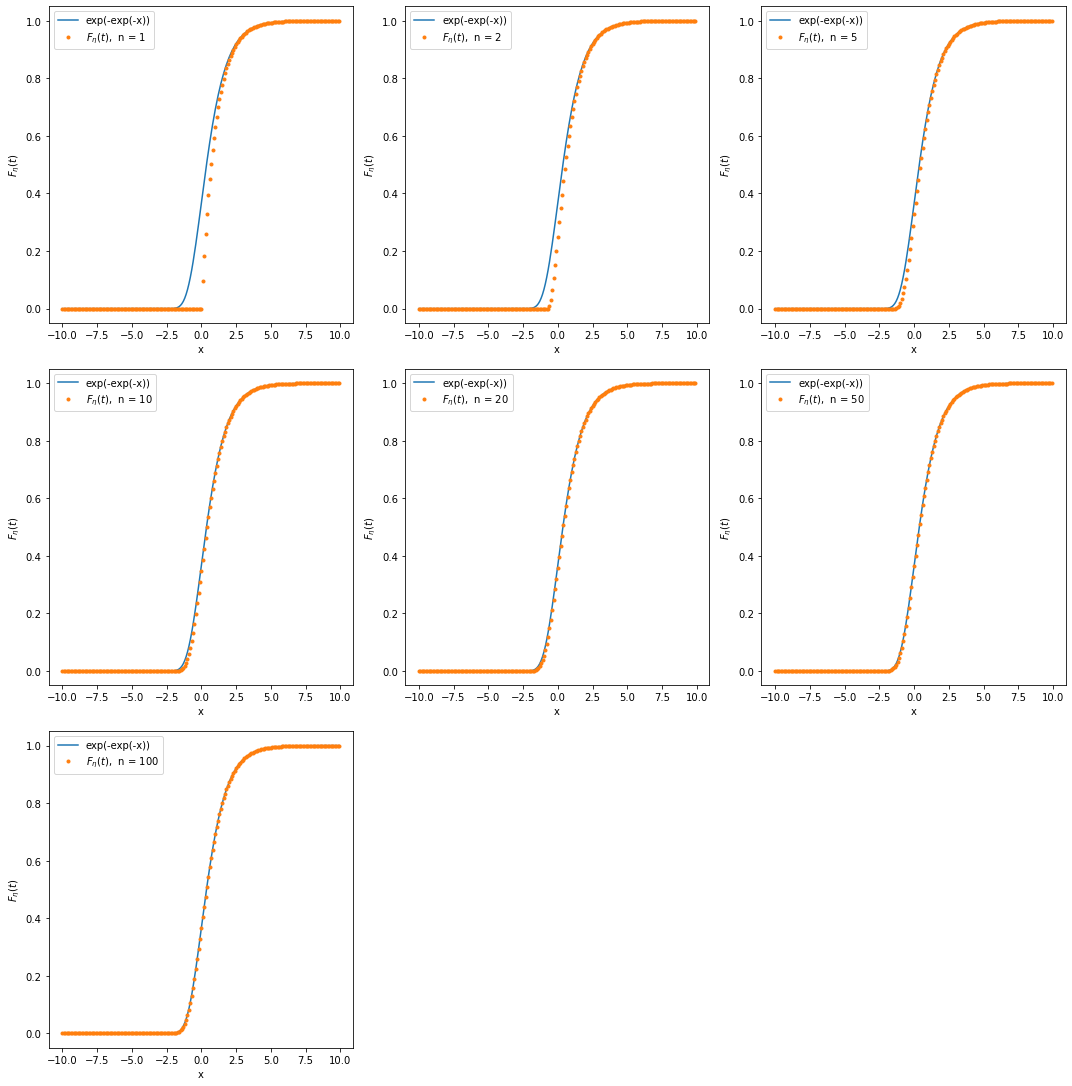

In [5]:
cmap = plt.get_cmap("tab10").colors

plt.figure(figsize=(15, 15))

x = [-10 + 0.1*i for i in range(200)]
y1 = [e2e(t) for t in x]

for k, n in enumerate([1, 2, 5, 10, 20, 50, 100]):
    
    y2 = [f(n, t) for t in x]
    
    plt.subplot(3, 3, k+1)
    plt.tight_layout()
    plt.plot(x, y1, label="exp(-exp(-x))")
    plt.plot(x, y2, '.', label="$F_{\eta}(t)$, " + " n = "+str(n))
    
    plt.xlabel("x")
    plt.ylabel(r"$F_{\eta}(t)$")
    plt.legend()
plt.show()

Видно, что даже при маленьких значениях уже видна хорошая сходимость